In [5]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ----------------------- -------------- 51.2/82.7 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 664.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=fc12d6e394afe612cc313c2d8132b8b83fcad9b532d27a164db625ca2a9c5f45
  Stored in directory: c:\users\hp notebook\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [132]:
import kaggle
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [134]:
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') 
zip_ref.extractall() # extract file to dir
zip_ref.close() # close file

In [136]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("orders.csv",na_values= ['Not Available', 'unknown'])
df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [282]:
df.tail(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
9984,9985,2023-08-04,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,OFF-LA-10003766,30,30,10,2
9985,9986,2023-09-30,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,OFF-SU-10000898,50,60,4,3
9986,9987,2022-11-30,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,TEC-AC-10003399,40,40,1,5
9987,9988,2023-04-01,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,TEC-AC-10001539,80,80,1,3
9988,9989,2022-11-17,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,TEC-PH-10004006,180,210,5,5
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3
9993,9994,2022-07-17,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,OFF-AP-10002684,210,240,2,3


In [25]:
df.shape

(9994, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [138]:
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           6
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [140]:
 df.isnull().sum()/df.shape[0]*100

Order Id            0.000000
Order Date          0.000000
Ship Mode           0.060036
Segment             0.000000
Country             0.000000
City                0.000000
State               0.000000
Postal Code         0.000000
Region              0.000000
Category            0.000000
Sub Category        0.000000
Product Id          0.000000
cost price          0.000000
List Price          0.000000
Quantity            0.000000
Discount Percent    0.000000
dtype: float64

In [142]:
df.duplicated().sum()

0

In [144]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order Id,9994.0,4997.500000,2885.163629,1.0,2499.25,4997.5,7495.75,9994.0
Postal Code,9994.0,55190.379428,32063.693350,1040.0,23223.00,56430.5,90008.00,99301.0
cost price,9994.0,201.189714,537.743203,0.0,20.00,50.0,180.00,18110.0
List Price,9994.0,229.756854,623.245839,0.0,20.00,50.0,210.00,22640.0
Quantity,9994.0,3.789574,2.225110,1.0,2.00,3.0,5.00,14.0
Discount Percent,9994.0,3.484090,1.114211,2.0,2.00,3.0,4.00,5.0


In [71]:
df.describe(include="object")

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub Category,Product Id
count,9994,9988,9994,9994,9994,9994,9994,9994,9994,9994
unique,730,4,3,1,531,49,4,3,17,1862
top,2023-03-09,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,OFF-PA-10001970
freq,28,5962,5191,9994,915,2001,3203,6026,1523,19


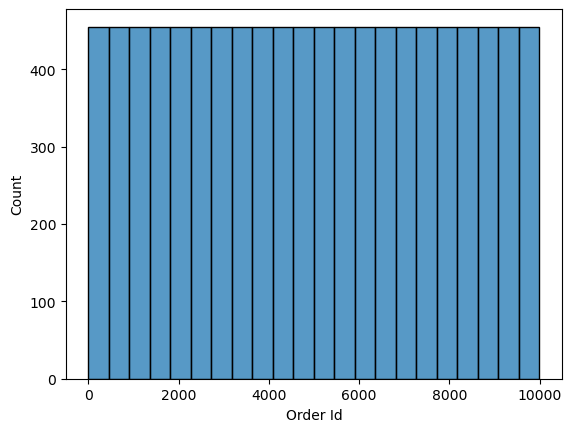

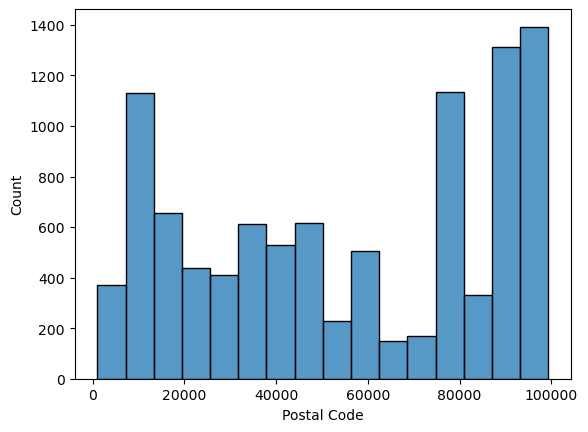

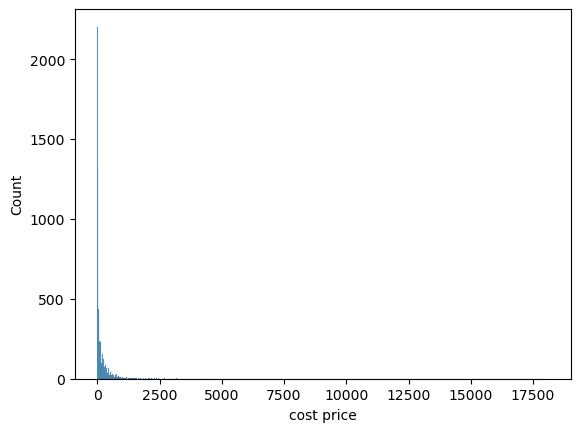

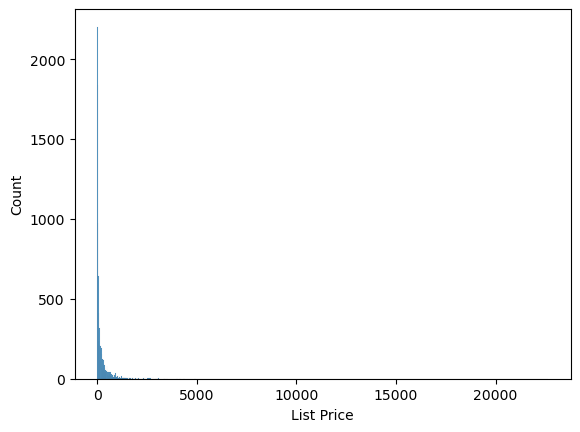

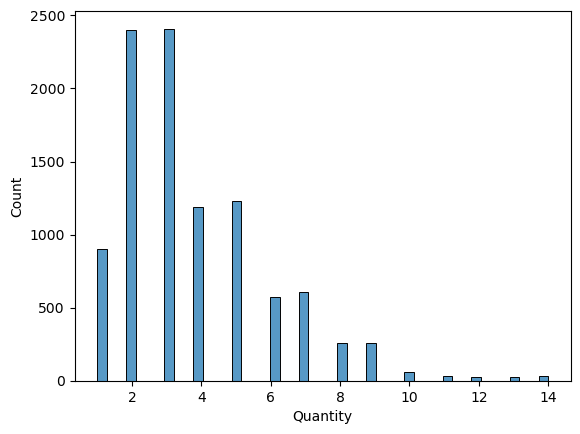

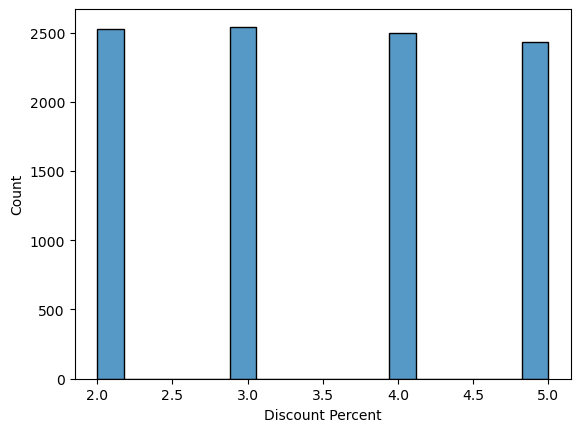

In [148]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

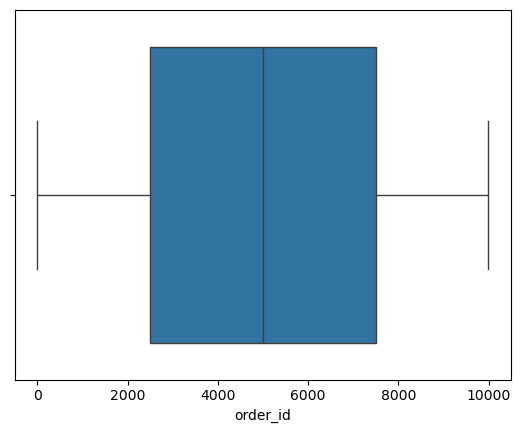

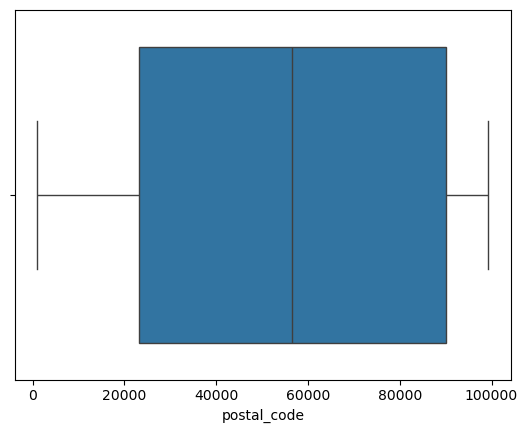

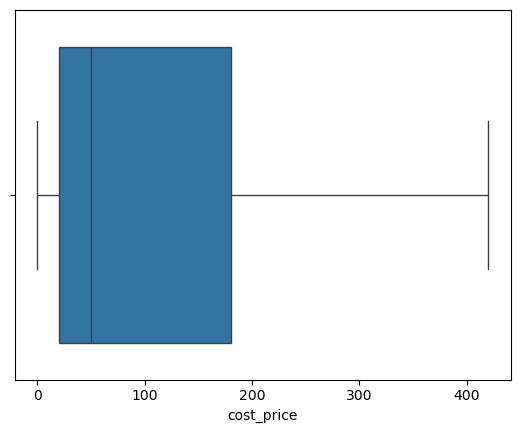

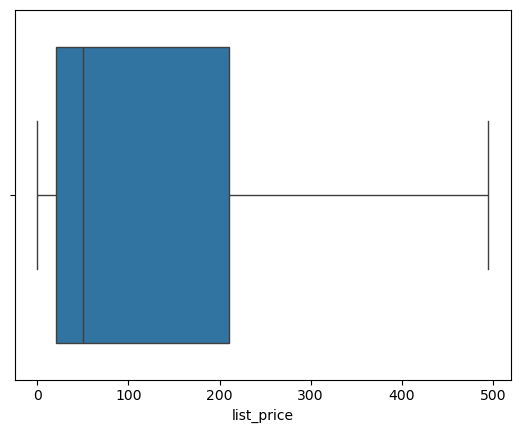

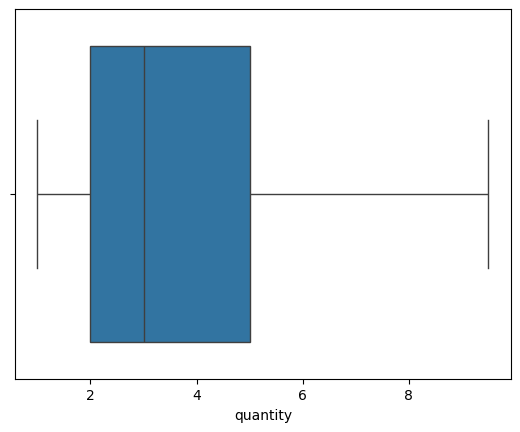

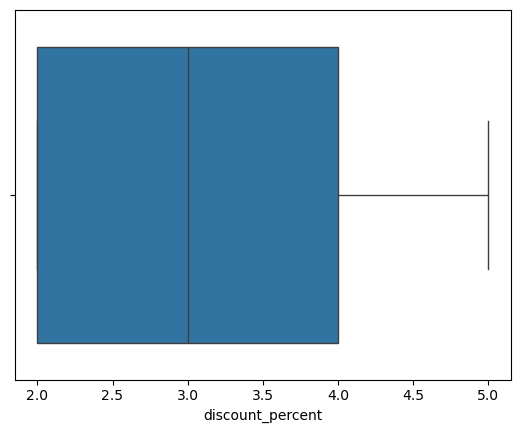

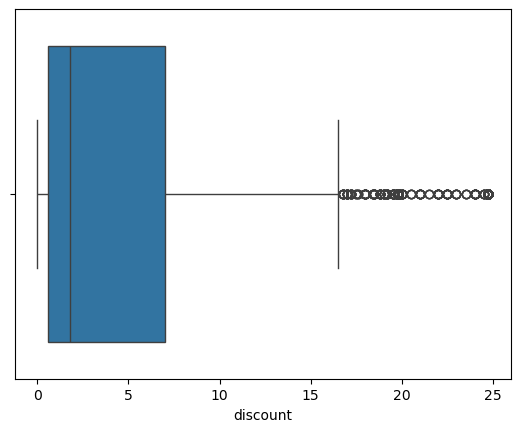

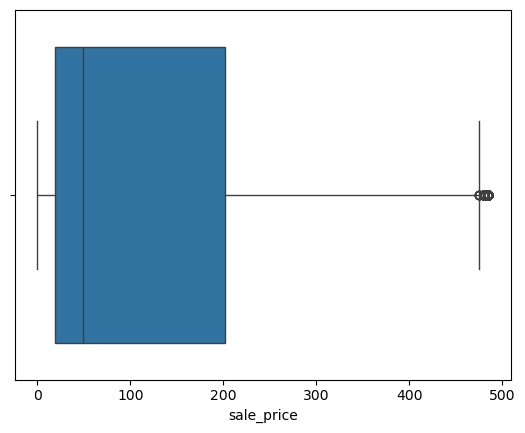

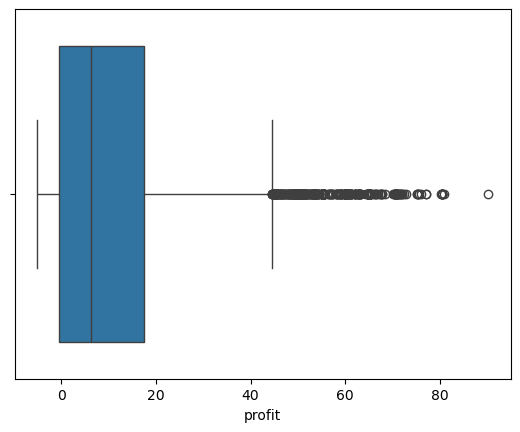

In [120]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [149]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return  lw,uw

In [152]:
wisker(df['Quantity'])

(-2.5, 9.5)

In [154]:
for i in ['cost price','List Price','Quantity']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

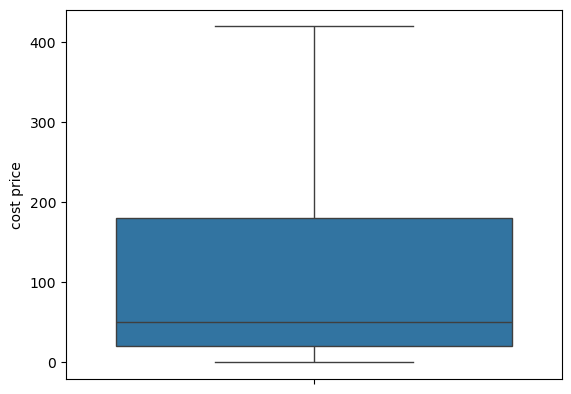

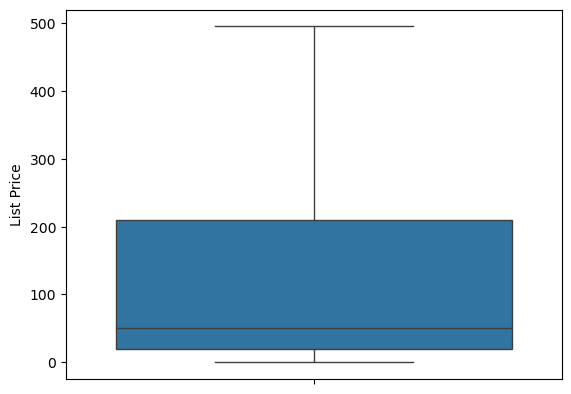

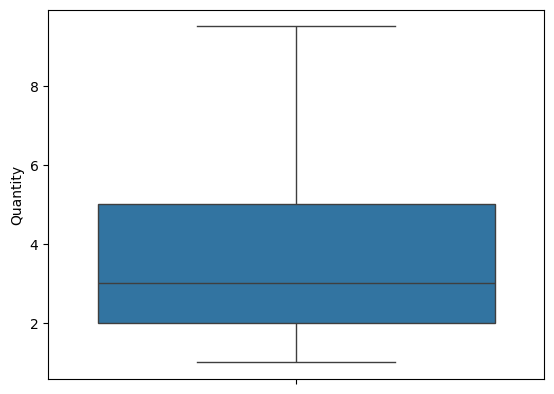

In [156]:
for i in ['cost price','List Price','Quantity']:
    sns.boxplot(df[i])
    plt.show()

In [158]:
df.columns = df.columns.str.lower()
df.columns =  df.columns.str.replace(' ','_')
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,420.0,495.0,3.0,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,420.0,495.0,5.0,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20.0,20.0,2.0,5


In [160]:
df['discount'] = df['list_price']*df['discount_percent']*.01

In [255]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2,5.20
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,420.0,495.0,3.0,3,14.85
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5,0.50
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,420.0,495.0,5.0,2,9.90
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20.0,20.0,2.0,5,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30.0,30.0,3.0,4,1.20
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70.0,90.0,2.0,4,3.60
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220.0,260.0,2.0,2,5.20
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30.0,30.0,4.0,3,0.90


In [164]:
df['sale_price']=df['list_price']-df['discount']

In [208]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2,5.20,254.80
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,420.0,495.0,3.0,3,14.85,480.15
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5,0.50,9.50
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,420.0,495.0,5.0,2,9.90,485.10
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20.0,20.0,2.0,5,1.00,19.00


In [166]:
df['profit']=df['sale_price']-df['cost_price']

In [212]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2,5.20,254.80,14.80
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,420.0,495.0,3.0,3,14.85,480.15,60.15
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5,0.50,9.50,-0.50
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,420.0,495.0,5.0,2,9.90,485.10,65.10
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20.0,20.0,2.0,5,1.00,19.00,-1.00


In [306]:
df.dtypes

order_id              int64
order_date           object
ship_mode            object
segment              object
country              object
city                 object
state                object
postal_code           int64
region               object
category             object
sub_category         object
product_id           object
cost_price          float64
list_price          float64
quantity            float64
discount_percent      int64
discount            float64
sale_price          float64
profit              float64
dtype: object

# Convert Object to date & and time

In [168]:
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")

In [32]:
  df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                 float64
list_price                 float64
quantity                   float64
discount_percent             int64
discount                   float64
sale_price                 float64
profit                     float64
dtype: object

In [170]:
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)

In [172]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2.0,5.20,254.80,14.80
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3.0,14.85,480.15,60.15
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2.0,0.50,9.50,-0.50
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5.0,9.90,485.10,65.10
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2.0,1.00,19.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3.0,1.20,28.80,-1.20
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2.0,3.60,86.40,16.40
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2.0,5.20,254.80,34.80
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4.0,0.90,29.10,-0.90


In [176]:
import sqlalchemy as sal
engine = sal.create_engine('mssql://LAPTOP-9RKA34U0\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

df.to_sql('df_orders', con=conn , index=False, if_exists = 'append')


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_19756\1575326029.py:2: SyntaxWarning: invalid escape sequence '\S'
  engine = sal.create_engine('mssql://LAPTOP-9RKA34U0\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')


38